In [39]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display, Image

%load_ext autoreload
%autoreload 1
%aimport notebook_utils

sns.set_context('notebook')
sns.set_style('white')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [40]:
root = '/Users/primdal/lustre/pulling/predict_bipy/'
model_root = root + 'models/'
csv_path = model_root + 'tun-mol-seed-1-frac-train-0.1-performance.csv'
df = pd.read_csv(csv_path)
df.sort_values(by='holdout_loss', inplace=True)
df['rank'] = range(len(df))

In [88]:
df.head()

,basename,best_epoch,best_val_acc,best_val_loss,extra_dense,holdout_acc,holdout_loss,lower_cutoff,n_nodes,network,smoothing,upper_cutoff,rank
5,recurrent_unit_lstm__n_nodes_6__extra_dense_Fa...,88,0.911111,0.201314,extra_dense_False,0.911111,0.267776,lower_cutoff_1e-07,n_nodes_6,recurrent_unit_lstm,smoothing_None,upper_cutoff_0.1,0
6,recurrent_unit_lstm__n_nodes_10__extra_dense_F...,74,0.955556,0.284816,extra_dense_False,0.911111,0.338329,lower_cutoff_1e-07,n_nodes_10,recurrent_unit_lstm,smoothing_None,upper_cutoff_0.1,1
4,recurrent_unit_lstm__n_nodes_6__extra_dense_Tr...,42,0.911111,0.276636,extra_dense_True,0.844444,0.434777,lower_cutoff_1e-07,n_nodes_6,recurrent_unit_lstm,smoothing_None,upper_cutoff_0.1,2
1,recurrent_unit_lstm__n_nodes_10__extra_dense_T...,29,0.911111,0.393328,extra_dense_True,0.822222,0.520216,lower_cutoff_1e-07,n_nodes_10,recurrent_unit_lstm,smoothing_None,upper_cutoff_0.1,3
0,recurrent_unit_gru__n_nodes_10__extra_dense_Fa...,68,0.888889,0.394657,extra_dense_False,0.822222,0.593179,lower_cutoff_1e-07,n_nodes_10,recurrent_unit_gru,smoothing_None,upper_cutoff_0.1,4


In [127]:
best_loss = {}

recurrent_unit_lstm__n_nodes_10__extra_dense_True__upper_cutoff_0.1__lower_cutoff_1e-07__smoothing_None
recurrent_unit_gru__n_nodes_10__extra_dense_True__upper_cutoff_0.1__lower_cutoff_1e-07__smoothing_None
recurrent_unit_gru__n_nodes_10__extra_dense_False__upper_cutoff_0.1__lower_cutoff_1e-07__smoothing_None
recurrent_unit_gru__n_nodes_10__extra_dense_False__upper_cutoff_0.1__lower_cutoff_1e-07__smoothing_None


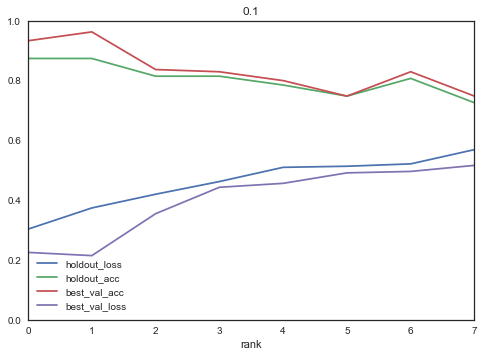

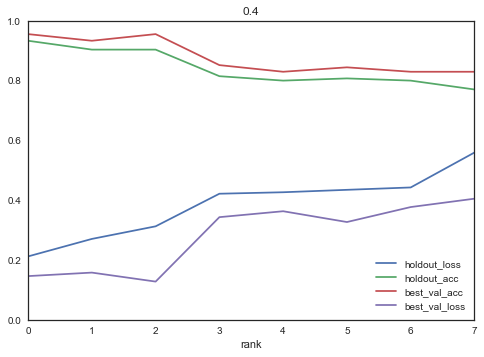

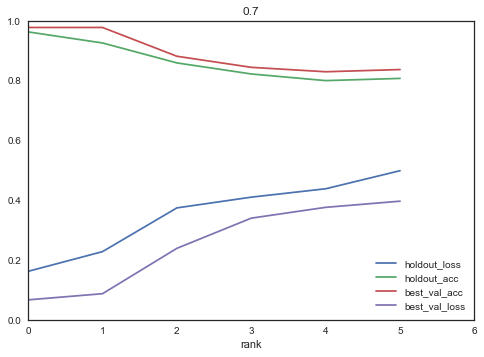

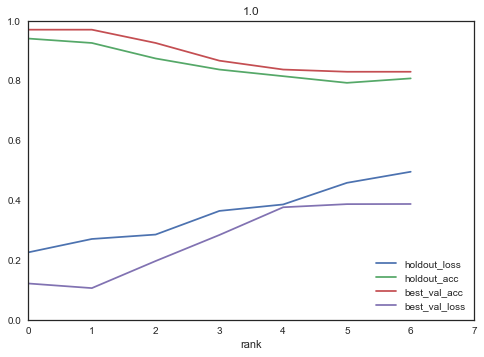

In [183]:
fracs = [0.1, 0.4, 0.7, 1.0]
losses = []
accs = []
for frac in fracs:
    seeds = [1, 2, 3]
    csv_basename = 'tun-mol-seed-{}-frac-train-%s-performance.csv' % frac
    df_combined = notebook_utils.get_average_df(seeds=seeds, csv_basename=csv_basename, model_root=model_root)
    notebook_utils.plot_ranked_performance(df_combined, title=frac)
    best_idx = df_combined.holdout_loss.idxmin()
    losses.append(df_combined.loc[best_idx, 'holdout_loss'])
    accs.append(df_combined.loc[best_idx, 'holdout_acc'])
    print(df_combined.loc[best_idx, 'basename'])

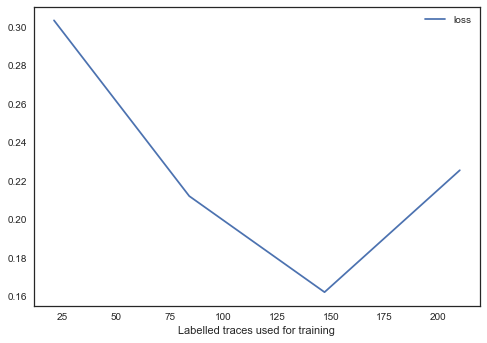

In [184]:
n_train = np.array(fracs) * 0.7 * 300
plt.plot(n_train, losses, label='loss')
#plt.plot(fracs, accs, label='accuracy')
plt.legend()
plt.xlabel('Labelled traces used for training')

# Frac = 0.1

In [128]:
seeds = [1, 2, 3]
csv_basename = 'tun-mol-seed-{}-frac-train-0.1-performance.csv'
df_combined = notebook_utils.get_average_df(seeds=seeds, csv_basename=csv_basename, model_root=model_root)

In [129]:
best_loss[0.1] = df_combined.holdout_loss.min()

In [130]:
df_combined.shape

(8, 11)

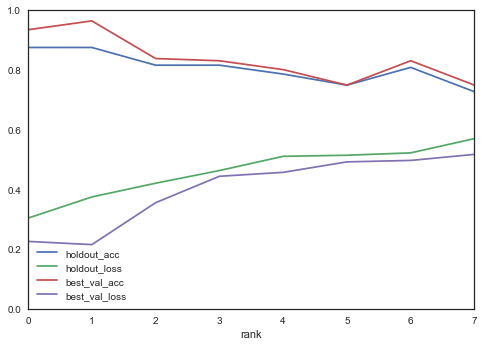

In [131]:
notebook_utils.plot_ranked_performance(df_combined)

# Frac = 0.4

In [132]:
seeds = [1, 2, 3]
csv_basename = 'tun-mol-seed-{}-frac-train-0.4-performance.csv'
df_combined = notebook_utils.get_average_df(seeds=seeds, csv_basename=csv_basename, model_root=model_root)

In [133]:
best_loss[0.4] = df_combined.holdout_loss.min()

In [134]:
df_combined.shape

(8, 11)

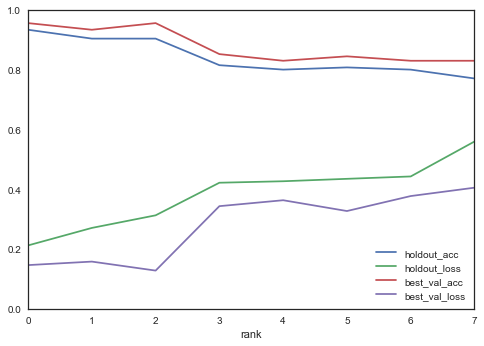

In [135]:
notebook_utils.plot_ranked_performance(df_combined)

# Frac = 0.7

In [136]:
seeds = [1, 2, 3]
csv_basename = 'tun-mol-seed-{}-frac-train-0.7-performance.csv'
df_combined = notebook_utils.get_average_df(seeds=seeds, csv_basename=csv_basename, model_root=model_root)

In [137]:
best_loss[0.7] = df_combined.holdout_loss.min()

In [138]:
df_combined.shape

(6, 11)

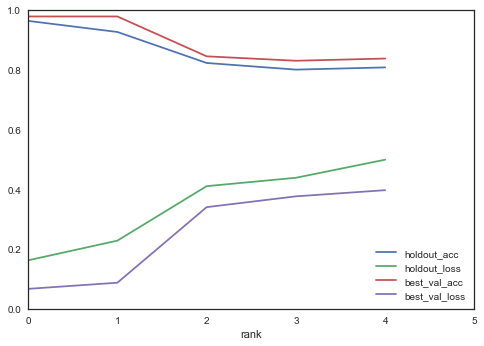

In [139]:
notebook_utils.plot_ranked_performance(df_combined)

# Frac = 1.0

In [185]:
seeds = [1, 2, 3]
csv_basename = 'tun-mol-seed-{}-frac-train-1.0-performance.csv'
df_combined = notebook_utils.get_average_df(seeds=seeds, csv_basename=csv_basename, model_root=model_root)

In [167]:
best_loss[1.0] = df_combined.holdout_loss.min()

In [168]:
df_combined.shape

(6, 11)

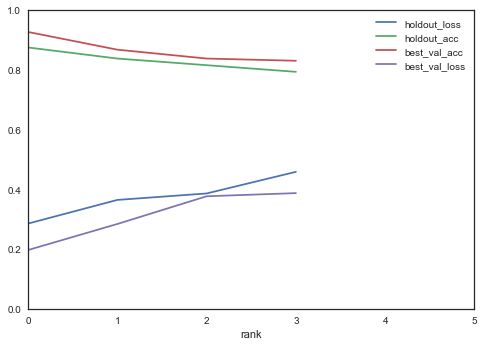

In [169]:
notebook_utils.plot_ranked_performance(df_combined)

# Performance plot

In [172]:
best_loss

{0.1: 0.30331643952652998,
 0.4: 0.21200360352235634,
 0.7: 0.16208425619266667,
 1.0: 0.28510243940966667}

In [173]:
losses = [best_loss[x] for x in fracs]

In [174]:
fracs

[0.1, 0.4, 0.7, 1.0]

In [175]:
losses

[0.30331643952652998,
 0.21200360352235634,
 0.16208425619266667,
 0.28510243940966667]

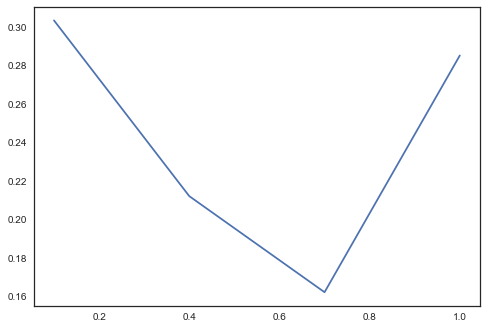

In [176]:
plt.plot(fracs, losses)